In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 150)

## Clean Flight Data

### Import Flight Data

In [42]:
df = pd.read_excel('output.xlsx')

In [43]:
df.head()

,Unnamed: 0,adhoc,aircrafttype,airline,airline_iata,arrival_delay,atc_ident,blocked,cancelled,codeshares,departure_delay,display_filed_altitude,distance_filed,diverted,faFlightID,filed_airspeed_kts,filed_altitude,filed_ete,flightnumber,full_aircrafttype,ident,inbound_faFlightID,progress_percent,route,status,tailnumber,type,origin_code,origin_city,origin_alternate_ident,origin_airport_name,destination_code,destination_city,destination_alternate_ident,destination_airport_name,filed_departure_time_epoch,filed_departure_time_tz,filed_departure_time_dow,filed_departure_time_time,filed_departure_time_date,filed_departure_time_localtime,estimated_departure_time_epoch,estimated_departure_time_tz,estimated_departure_time_dow,estimated_departure_time_time,estimated_departure_time_date,estimated_departure_time_localtime,actual_departure_time_epoch,actual_departure_time_tz,actual_departure_time_dow,actual_departure_time_time,actual_departure_time_date,actual_departure_time_localtime,filed_arrival_time_epoch,filed_arrival_time_tz,filed_arrival_time_dow,filed_arrival_time_time,filed_arrival_time_date,filed_arrival_time_localtime,estimated_arrival_time_epoch,estimated_arrival_time_tz,estimated_arrival_time_dow,estimated_arrival_time_time,estimated_arrival_time_date,estimated_arrival_time_localtime,actual_arrival_time_epoch,actual_arrival_time_tz,actual_arrival_time_dow,actual_arrival_time_time,actual_arrival_time_date,actual_arrival_time_localtime
0,0,False,A320,BAW,BA,0,NaN,False,False,"QTR5903,JAL7793,AAL6359,QTR5903,JAL7793,AAL635...",0,NaN,973,False,BAW502-1574228736-airline-0140,350.0,NaN,8700,502,A320,BAW502,NaN,-1,NaN,Scheduled,NaN,Form_Airline,EGLL,"London, England",LHR,London Heathrow,LPPT,Lisbon,LIS,General Humberto Delgado Airport,1574435700,GMT,Friday,03:15PM,22/11/2019,1574435700,1574435700,GMT,Friday,03:15PM,22/11/2019,1574435700,0,NaN,NaN,NaN,NaN,NaN,1574444400,WET,Friday,05:40PM,22/11/2019,1574444400,1574444400,WET,Friday,05:40PM,22/11/2019,1574444400,0,NaN,NaN,NaN,NaN,NaN
1,1,False,A320,BAW,BA,0,NaN,False,False,"QTR5903,JAL7793,AAL6359,QTR5903,JAL7793,AAL635...",0,NaN,973,False,BAW502-1574142327-airline-0195,350.0,NaN,8700,502,A320,BAW502,NaN,-1,NaN,Scheduled,NaN,Form_Airline,EGLL,"London, England",LHR,London Heathrow,LPPT,Lisbon,LIS,General Humberto Delgado Airport,1574349000,GMT,Thursday,03:10PM,21/11/2019,1574349000,1574349000,GMT,Thursday,03:10PM,21/11/2019,1574349000,0,NaN,NaN,NaN,NaN,NaN,1574357700,WET,Thursday,05:35PM,21/11/2019,1574357700,1574357700,WET,Thursday,05:35PM,21/11/2019,1574357700,0,NaN,NaN,NaN,NaN,NaN
2,2,False,A320,BAW,BA,900,BAW502P,False,False,"QTR5903,JAL7793,AAL6359,QTR5903,JAL7793,AAL635...",1380,NaN,973,False,BAW502-1574055931-airline-0064,350.0,NaN,8280,502,A320,BAW502,BAW869-1574055931-airline-0159,100,NaN,Arrived / Gate Arrival,G-EUYK,Form_Airline,EGLL,"London, England",LHR,London Heathrow,LPPT,Lisbon,LIS,General Humberto Delgado Airport,1574262600,GMT,Wednesday,03:10PM,20/11/2019,1574262600,1574264572,GMT,Wednesday,03:42PM,20/11/2019,1574264572,1574264572,GMT,Wednesday,03:42PM,20/11/2019,1.574265e+09,1574270880,WET,Wednesday,05:28PM,20/11/2019,1574270880,1574272440,WET,Wednesday,05:54PM,20/11/2019,1574272440,1574272440,WET,Wednesday,05:54PM,20/11/2019,1.574272e+09
3,3,False,A320,BAW,BA,360,BAW502P,False,False,"QTR5903,JAL7793,AAL6359,QTR5903,JAL7793,AAL635...",540,NaN,973,False,BAW502-1573969526-airline-0084,350.0,NaN,8100,502,A320,BAW502,BAW869-1573969526-airline-0067,100,NaN,Arrived / Gate Arrival,G-EUUM,Form_Airline,EGLL,"London, England",LHR,London Heathrow,LPPT,Lisbon,LIS,General Humberto Delgado Airport,1574179200,GMT,Tuesday,04:00PM,19/11/2019,1574179200,1574180599,GMT,Tuesday,04:23PM,19/11/2019,1574180599,1574180599,GMT,Tuesday,04:23PM,19/11/2019,1.574181e+09,1574187300,WET,Tuesday,06:15PM,19/11/2019,1574187300,1574188560,WET,Tuesday,06:36PM,19/11/2019,1574188560,1574188560,WET,Tuesday,06:36PM,19/11/2019,1.574189e+09
4,4,False,A320,BAW,BA,-900,BAW502P,False,False,"QTR5903,JAL7793,AAL635

In [44]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Remove Duplicates

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
len(df)

10236

### Confirm Origin Airports

In [47]:
df['origin_airport_name'].unique()

array(['London Heathrow', 'Manchester', 'Edinburgh', 'Aberdeen',
       'George Best Belfast City', 'London Gatwick', "Glasgow Int'l",
       'Denham Aerodrome', 'London Luton', 'London Stansted',
       "Birmingham Int'l", "Bristol Int'l", 'East Midlands', 'Newcastle',
       'London City', "Exeter Int'l", 'Solent Airport', "Cardiff Int'l",
       'Jersey', "Leeds Bradford Int'l", 'Oxford', 'Seppe',
       'Strasbourg Entzheim', 'Liverpool John Lennon', 'Southampton',
       'Hartsfield-Jackson Intl', 'Abbeyshrule Aerodrome', 'Coventry',
       'London Southend', 'Elstree Airfield', 'Singapore Changi',
       'Oaksey Park', "Int'l Katowice in Pyrzowice", "Malpensa Int'l",
       "Orio al Serio Int'l", 'Shannon', "Belfast Int'l", 'Blackbushe',
       "Chennai Int'l", 'Gloucestershire', 'Novosibirsk Tolmachevo',
       "Zhengzhou Xinzheng Int'l", 'Karaganda', 'Birmingham, England',
       'Graz (Thalerhof)', 'Cranfield', "Dublin Int'l",
       "Bucharest Henri Coandă Int'l", 'Wellesbour

In [48]:
airport_codes = pd.read_csv('airport_codes.csv')

In [49]:
codes = list(airport_codes['Airport Code'])

In [50]:
df = df.loc[df['origin_alternate_ident'].isin(codes)]

In [51]:
df['origin_airport_name'].unique()

array(['London Heathrow', 'Manchester', 'Edinburgh', 'Aberdeen',
       'George Best Belfast City', 'London Gatwick', "Glasgow Int'l",
       'London Luton', 'London Stansted', "Birmingham Int'l",
       "Bristol Int'l", 'East Midlands', 'Newcastle', 'London City',
       "Cardiff Int'l", 'Jersey', "Leeds Bradford Int'l",
       'Liverpool John Lennon', 'Southampton', "Belfast Int'l"],
      dtype=object)

In [52]:
len(df)

10098

### Identify Missing Values

In [53]:
df.isna().sum()

adhoc                                    0
aircrafttype                            82
airline                                  0
airline_iata                             0
arrival_delay                            0
atc_ident                             4091
blocked                                  0
cancelled                                0
codeshares                            2721
departure_delay                          0
display_filed_altitude                8842
distance_filed                           0
diverted                                 0
faFlightID                               0
filed_airspeed_kts                      39
filed_altitude                        8842
filed_ete                                0
flightnumber                             0
full_aircrafttype                       82
ident                                    0
inbound_faFlightID                    1866
progress_percent                         0
route                                 8827
status     

### filed_altitude , display_filed_altitude, route

All of these measures have more than 8000 missing values (i.e. more than 80% of records are missing this data).  Therefore, these columns will be dropped.

In [54]:
df.drop(['filed_altitude','display_filed_altitude','route'], axis=1, inplace=True)

### atc_ident, codeshares, tailnumber, inbound_faFlightID

- **atc_ident**: There are 4091 values missing from atc_ident.  This field refers to the flight number, which is also contained within the field ident.  For this reason, atc_ident can be dropped.  
- **codeshares**: There are 2721 missing values from codeshares.  This field details shared flight numbers.  It should not provide any additional information relevant to delays, and can therefore be dropped.
- **tailnumber**: There are 1392 missing values from tailnumber.  The tailnumber is equivalent to the registration number of a car.  This is not relevant to analysis, and can therefore be dropped.
- **inbound_faFlightID**: Another identification number that is not relevant to analysis.  This can therefore be dropped.

In [55]:
df.drop(['atc_ident', 'codeshares','tailnumber','inbound_faFlightID'], axis=1, inplace=True)

### actual_departure_time, acutal_arrival_time

For thsi model, we can only use observations for which the flight has actually arrived.  For flights that are yet to leave, or are en route, there will be no way of deducing actual arrival time.  For this reason, flights that do not have an 'arrived' status will be dropped from the dataset.  

In [72]:
flight_status = list(df['status'].unique())

In [75]:
flight_status = flight_status[0:2]

In [76]:
df = df.loc[df['status'].isin(flight_status)]

### destination_city

As can be seen from the below, the final missing value to address is destination_city.  In theory, it should be possible to deduce this by looking at the destination airport.

In [80]:
df.isna().sum()

adhoc                                  0
aircrafttype                           0
airline                                0
airline_iata                           0
arrival_delay                          0
blocked                                0
cancelled                              0
departure_delay                        0
distance_filed                         0
diverted                               0
faFlightID                             0
filed_airspeed_kts                     8
filed_ete                              0
flightnumber                           0
full_aircrafttype                      0
ident                                  0
progress_percent                       0
status                                 0
type                                   0
origin_code                            0
origin_city                            0
origin_alternate_ident                 0
origin_airport_name                    0
destination_code                       0
destination_city

In [84]:
df.loc[df['destination_city'].isna()]

,adhoc,aircrafttype,airline,airline_iata,arrival_delay,blocked,cancelled,departure_delay,distance_filed,diverted,faFlightID,filed_airspeed_kts,filed_ete,flightnumber,full_aircrafttype,ident,progress_percent,status,type,origin_code,origin_city,origin_alternate_ident,origin_airport_name,destination_code,destination_city,destination_alternate_ident,destination_airport_name,filed_departure_time_epoch,filed_departure_time_tz,filed_departure_time_dow,filed_departure_time_time,filed_departure_time_date,filed_departure_time_localtime,estimated_departure_time_epoch,estimated_departure_time_tz,estimated_departure_time_dow,estimated_departure_time_time,estimated_departure_time_date,estimated_departure_time_localtime,actual_departure_time_epoch,actual_departure_time_tz,actual_departure_time_dow,actual_departure_time_time,actual_departure_time_date,actual_departure_time_localtime,filed_arrival_time_epoch,filed_arrival_time_tz,filed_arrival_time_dow,filed_arrival_time_time,filed_arrival_time_date,filed_arrival_time_localtime,estimated_arrival_time_epoch,estimated_arrival_time_tz,estimated_arrival_time_dow,estimated_arrival_time_time,estimated_arrival_time_date,estimated_arrival_time_localtime,actual_arrival_time_epoch,actual_arrival_time_tz,actual_arrival_time_dow,actual_arrival_time_time,actual_arrival_time_date,actual_arrival_time_localtime
9158,False,A320,TAR,TU,-697,False,False,1197,1140,False,TAR791-1573969544-airline-0262,372.0,9600,791,A320,TAR791,100,Arrived / Gate Arrival,Form_Airline,EGLL,"London, England",LHR,London Heathrow,DTTA,NaN,TUN,Tunis-Carthage Int'l,1574182800,GMT,Tuesday,05:00PM,19/11/2019,1574182800,1574183397,GMT,Tuesday,05:09PM,19/11/2019,1574183397,1574183397,GMT,Tuesday,05:09PM,19/11/2019,1.574183e+09,1574192400,CET,Tuesday,08:40PM,19/11/2019,1574196000,1574192303,CET,Tuesday,08:38PM,19/11/2019,1574195903,1574192303,CET,Tuesday,08:38PM,19/11/2019,1.574196e+09
9159,False,A320,TAR,TU,1513,False,False,1440,1114,False,TAR791-1573883190-airline-0345,388.0,7560,791,A320,TAR791,100,Arrived / Gate Arrival,Form_Airline,EGKK,"London, England",LGW,London Gatwick,DTTA,NaN,TUN,Tunis-Carthage Int'l,1574074200,GMT,Monday,10:50AM,18/11/2019,1574074200,1574076713,GMT,Monday,11:31AM,18/11/2019,1574076713,1574076713,GMT,Monday,11:31AM,18/11/2019,1.574077e+09,1574081760,CET,Monday,01:56PM,18/11/2019,1574085360,1574085420,CET,Monday,02:57PM,18/11/2019,1574089020,1574085313,CET,Monday,02:55PM,18/11/2019,1.574089e+09
9160,False,A320,TAR,TU,-550,False,False,1658,1140,False,TAR791-1573796749-airline-0264,372.0,9600,791,A320,TAR791,100,Arrived / Gate Arrival,Form_Airline,EGLL,"London, England",LHR,London Heathrow,DTTA,NaN,TUN,Tunis-Carthage Int'l,1574010000,GMT,Sunday,05:00PM,17/11/2019,1574010000,1574011058,GMT,Sunday,05:17PM,17/11/2019,1574011058,1574011058,GMT,Sunday,05:17PM,17/11/2019,1.574011e+09,1574019600,CET,Sunday,08:40PM,17/11/2019,1574023200,1574019650,CET,Sunday,08:40PM,17/11/2019,1574023250,1574019650,CET,Sunday,08:40PM,17/11/2019,1.574023e+09
9161,False,A320,TAR,TU,183,False,False,1593,1140,False,TAR791-1573710346-airline-0310,372.0,9600,791,A320,TAR791,100,Arrived / Gate Arrival,Form_Airline,EGLL,"London, England",LHR,London Heathrow,DTTA,NaN,TUN,Tunis-Carthage Int'l,1573923600,GMT,Saturday,05:00PM,16/11/2019,1573923600,1573924593,GMT,Saturday,05:16PM,16/11/2019,1573924593,1573924593,GMT,Saturday,05:16PM,16/11/2019,1.573925e+09,1573933200,CET,Saturday,08:40PM,16/11/2019,1573936800,1573933983,CET,Saturday,08:53PM,16/11/2019,1573937583,1573933983,CET,Saturday,08:53PM,16/11/2019,1.573938e+09
9162,False,A320,TAR,TU,92,False,False,1584,1140,False,TAR791-1573623954-airline-0408,372.0,9600,791,A320,TAR791,100,Arrived / Gate Arrival,Form_Airline,EGLL,"London, England",LHR,London Heathrow,DTTA,NaN,TUN,Tunis-Carthage Int'l,1573837200,GMT,Friday,05:00PM,15/11/2019,1573837200,1573838184,GMT,Friday,05:16PM,15/11/2019,1573838184,1573838184,GMT,Friday,05:16PM,15/11/2019,1.573838e+09,1573846800,CET,Friday,08:40PM,15/11/2019,1573850400,157384

As can be seen from the above, 'Tunis-Carthage Int'l' is the destination airport for all missing destination_city records.  This airport is situated in Tunis, Tunisia.  It is therefore possible to fill this field in.

In [89]:
df.fillna('Tunis, Tunisia', inplace=True)

In [90]:
df.isna().sum()

adhoc                                 0
aircrafttype                          0
airline                               0
airline_iata                          0
arrival_delay                         0
blocked                               0
cancelled                             0
departure_delay                       0
distance_filed                        0
diverted                              0
faFlightID                            0
filed_airspeed_kts                    0
filed_ete                             0
flightnumber                          0
full_aircrafttype                     0
ident                                 0
progress_percent                      0
status                                0
type                                  0
origin_code                           0
origin_city                           0
origin_alternate_ident                0
origin_airport_name                   0
destination_code                      0
destination_city                      0


## Preliminary Visualisation

### Number of Flights by Airline

In [99]:
airlines = df.groupby(['airline']).count()[['adhoc']]

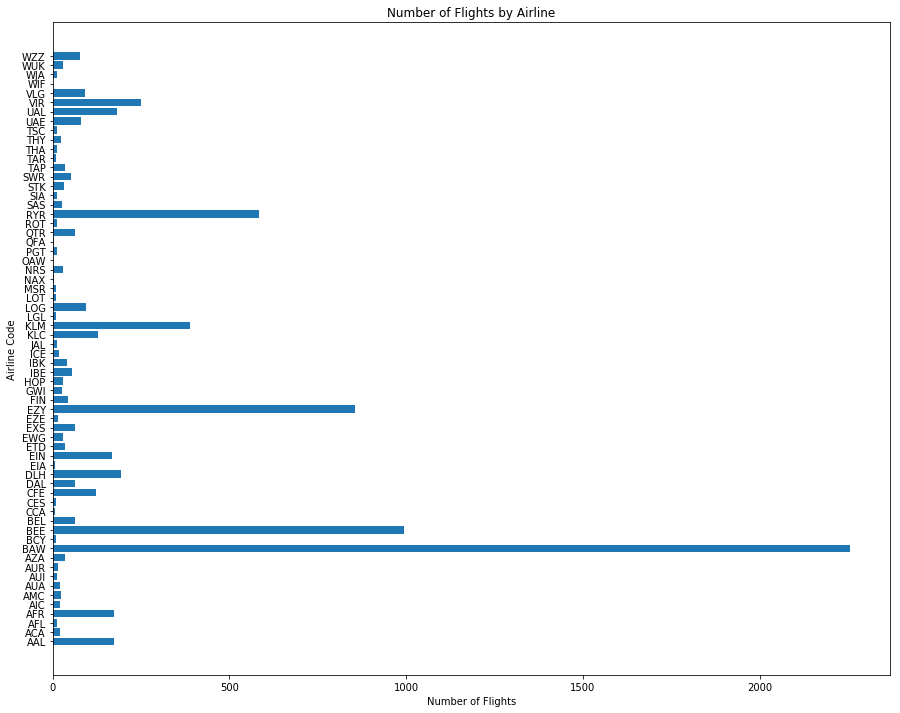

In [107]:
plt.figure(figsize=(15,12))
plt.barh(airlines.index, airlines['adhoc'])
plt.ylabel('Airline Code')
plt.xlabel('Number of Flights')
plt.title('Number of Flights by Airline')
plt.show()

### Mean Delay by Airline

In [109]:
airlines = df.groupby(['airline']).mean()[['arrival_delay']]

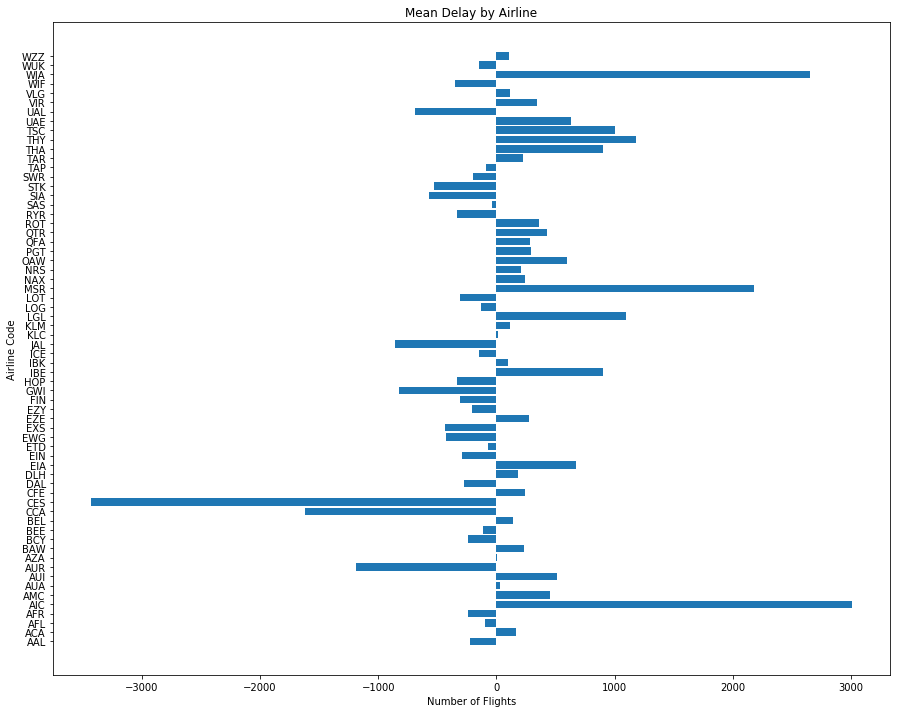

In [111]:
plt.figure(figsize=(15,12))
plt.barh(airlines.index, airlines['arrival_delay'])
plt.ylabel('Airline Code')
plt.xlabel('Number of Flights')
plt.title('Mean Delay by Airline')
plt.show()

### Max Delay by Airline

In [112]:
airlines = df.groupby(['airline']).max()[['arrival_delay']]

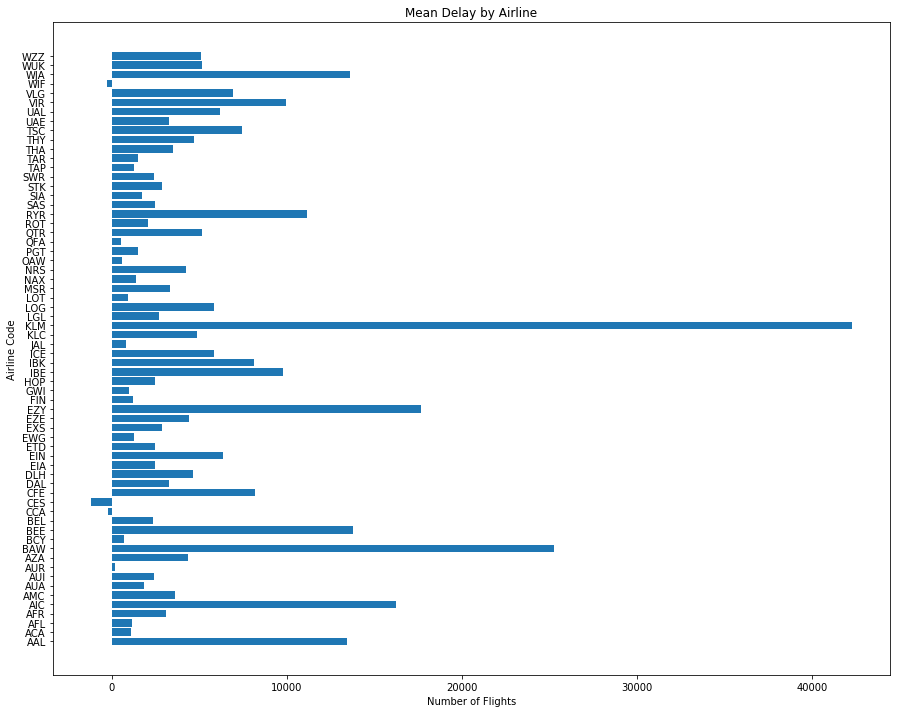

In [113]:
plt.figure(figsize=(15,12))
plt.barh(airlines.index, airlines['arrival_delay'])
plt.ylabel('Airline Code')
plt.xlabel('Number of Flights')
plt.title('Mean Delay by Airline')
plt.show()